In [29]:
#pip install pytrends
#pip install yfinance

import yfinance as yf
from pytrends.request import TrendReq
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
#build list of keywords
kw_list = ["Tesla"] 

# build the payload
pytrends.build_payload(kw_list, timeframe='2021-04-01 2021-06-30', geo='US')

In [16]:
# store interest over time information in df
teslaTrendsdf = pytrends.interest_over_time()
teslaTrendsdf = teslaTrendsdf.rename(columns={'Tesla': 'Search Interest'})
#teslaTrendsdf.reset_index(inplace=True, drop=True)
teslaTrendsdf

,Search Interest,isPartial
date,,
2021-04-01,70,False
2021-04-02,69,False
2021-04-03,63,False
2021-04-04,61,False
2021-04-05,77,False
...,...,...
2021-06-26,63,False
2021-06-27,63,False
2021-06-28,66,False


In [19]:
teslaTrendsMean = teslaTrendsdf['Search Interest'].mean()
#print(teslaTrendsdf)
teslaTrendsdf["Points Away From Mean"] = teslaTrendsdf["Search Interest"] - teslaTrendsMean
#telsaStockdf.set_index('Date', inplace=True)
teslaTrendsdf


            Search Interest  isPartial  Points Away From Mean
date                                                         
2021-04-01               70      False                2.89011
2021-04-02               69      False                1.89011
2021-04-03               63      False               -4.10989
2021-04-04               61      False               -6.10989
2021-04-05               77      False                9.89011
...                     ...        ...                    ...
2021-06-26               63      False               -4.10989
2021-06-27               63      False               -4.10989
2021-06-28               66      False               -1.10989
2021-06-29               65      False               -2.10989
2021-06-30               62      False               -5.10989

[91 rows x 3 columns]


,Search Interest,isPartial,Points Away From Mean
date,,,
2021-04-01,70,False,2.89011
2021-04-02,69,False,1.89011
2021-04-03,63,False,-4.10989
2021-04-04,61,False,-6.10989
2021-04-05,77,False,9.89011
...,...,...,...
2021-06-26,63,False,-4.10989
2021-06-27,63,False,-4.10989
2021-06-28,66,False,-1.10989


In [20]:
telsaStockdf = pd.read_csv("https://raw.githubusercontent.com/atlas125gev/StockProject/main/Homework6/TSLA.csv")
telsaStockdf.set_index('Date', inplace=True)
telsaStockdf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,688.369995,692.419983,659.419983,661.750000,661.750000,35298400
2021-04-05,707.710022,708.159973,684.700012,691.049988,691.049988,41842800
2021-04-06,690.299988,696.549988,681.369995,691.619995,691.619995,28271800
2021-04-07,687.000000,691.380005,667.840027,670.969971,670.969971,26309400
2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300
...,...,...,...,...,...,...
2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700
2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200


# Graphs
## Matplotlib
This will demostrate the Telsa Search Interest distribution. This is a metric Google takes by normalizing a score of 100 to the mosted search day within the period.  You will notice this is not a normal distribution. 





Text(0.5, 0, 'Telsa Search Interest Scores')

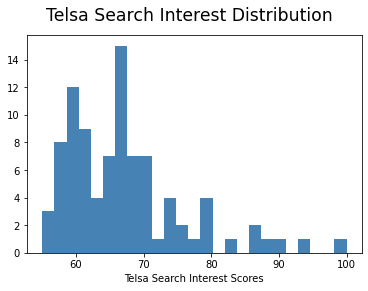

In [27]:
plt.hist(teslaTrendsdf["Search Interest"], bins=25,  histtype='stepfilled', color='steelblue')
plt.suptitle('Telsa Search Interest Distribution', ha='center', fontsize='xx-large')
plt.xlabel('Telsa Search Interest Scores')

## Seaborn

This will demostrate the close price of Tesla over time

Text(0.5, 1.0, 'Tesla Close Price Over Time')

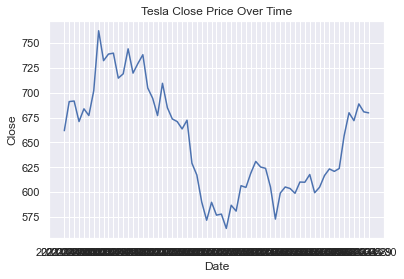

In [38]:
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("telsaStockdf")

# Plot the responses for different events and regions
sns.lineplot(x="Date", y="Close",
             #hue="region", style="event",
             data=telsaStockdf).set_title("Tesla Close Price Over Time")


## Plotly

This shows a scatter plot of close price with the trading volume

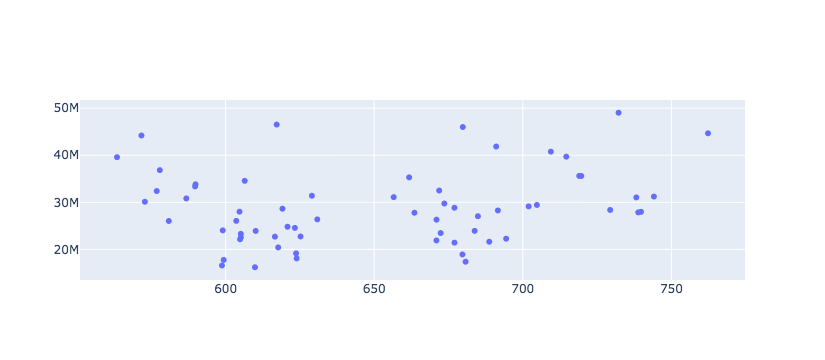

In [49]:
#teslaPlotlyScatterData = telsaStockdf[['Close'],['Volume']]
#df = px.data.teslaPlotlyScatterData() 
#fig = px.scatter(teslaPlotlyScatterData, x="Close", y="Volume")
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
                x=telsaStockdf['Close'],
                y=telsaStockdf['Volume'],
                mode='markers'
))
fig.show()